In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
billGatesTimelineFrame = pd.read_csv('billGatesTimelineFrame.csv').fillna('N/A')
elonMuskTimelineFrame = pd.read_csv('elonMuskTimelineFrame.csv').fillna('N/A')
ellenDeGeneresTimelineFrame = pd.read_csv('ellenDeGeneresTimelineFrame.csv').fillna('N/A')
usersFrame = pd.read_csv('usersFrame.csv').fillna('N/A')

In [3]:
mentionsGraph = nx.Graph()

Get all the mentions of the first account(excluding 'N/A')

In [4]:
billMentionsRaw = billGatesTimelineFrame['user_mentions'][billGatesTimelineFrame['user_mentions']!='N/A']

Definition of a transformation function to get the real unique mentions

In [5]:
def flatten(l:list)->list:
    return [j for i in l for j in eval(i)]

In [6]:
billMentions = pd.Series(flatten(billMentionsRaw))

In [7]:
billMentionsUnique=pd.Series(flatten(billMentionsRaw.unique()))

In [8]:
print(len(billMentionsUnique))

132


In [9]:
print(len(billMentions))

163


In [10]:
#Weights
weights=pd.Series(billMentionsUnique).map(lambda mention:len((billMentions==mention)[(billMentions==mention)==True]))

In [11]:
combined = pd.DataFrame({'mention':billMentionsUnique,'weight':weights})

combined

In [12]:
mentionsGraph.add_nodes_from(combined['mention'])

In [13]:
mentionsGraph.add_nodes_from(['Main_Account'])

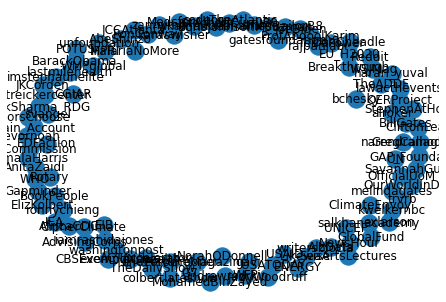

In [14]:
nx.draw(mentionsGraph,with_labels =True)

In [15]:
#Connections, Bill in center, every mention a connection, weight is the number of mentions(this metric is wrong, needs refinement)

In [16]:
for index, row in combined.iterrows():
    mentionsGraph.add_edges_from([ ('Main_Account', row[0])], weight=row[1])

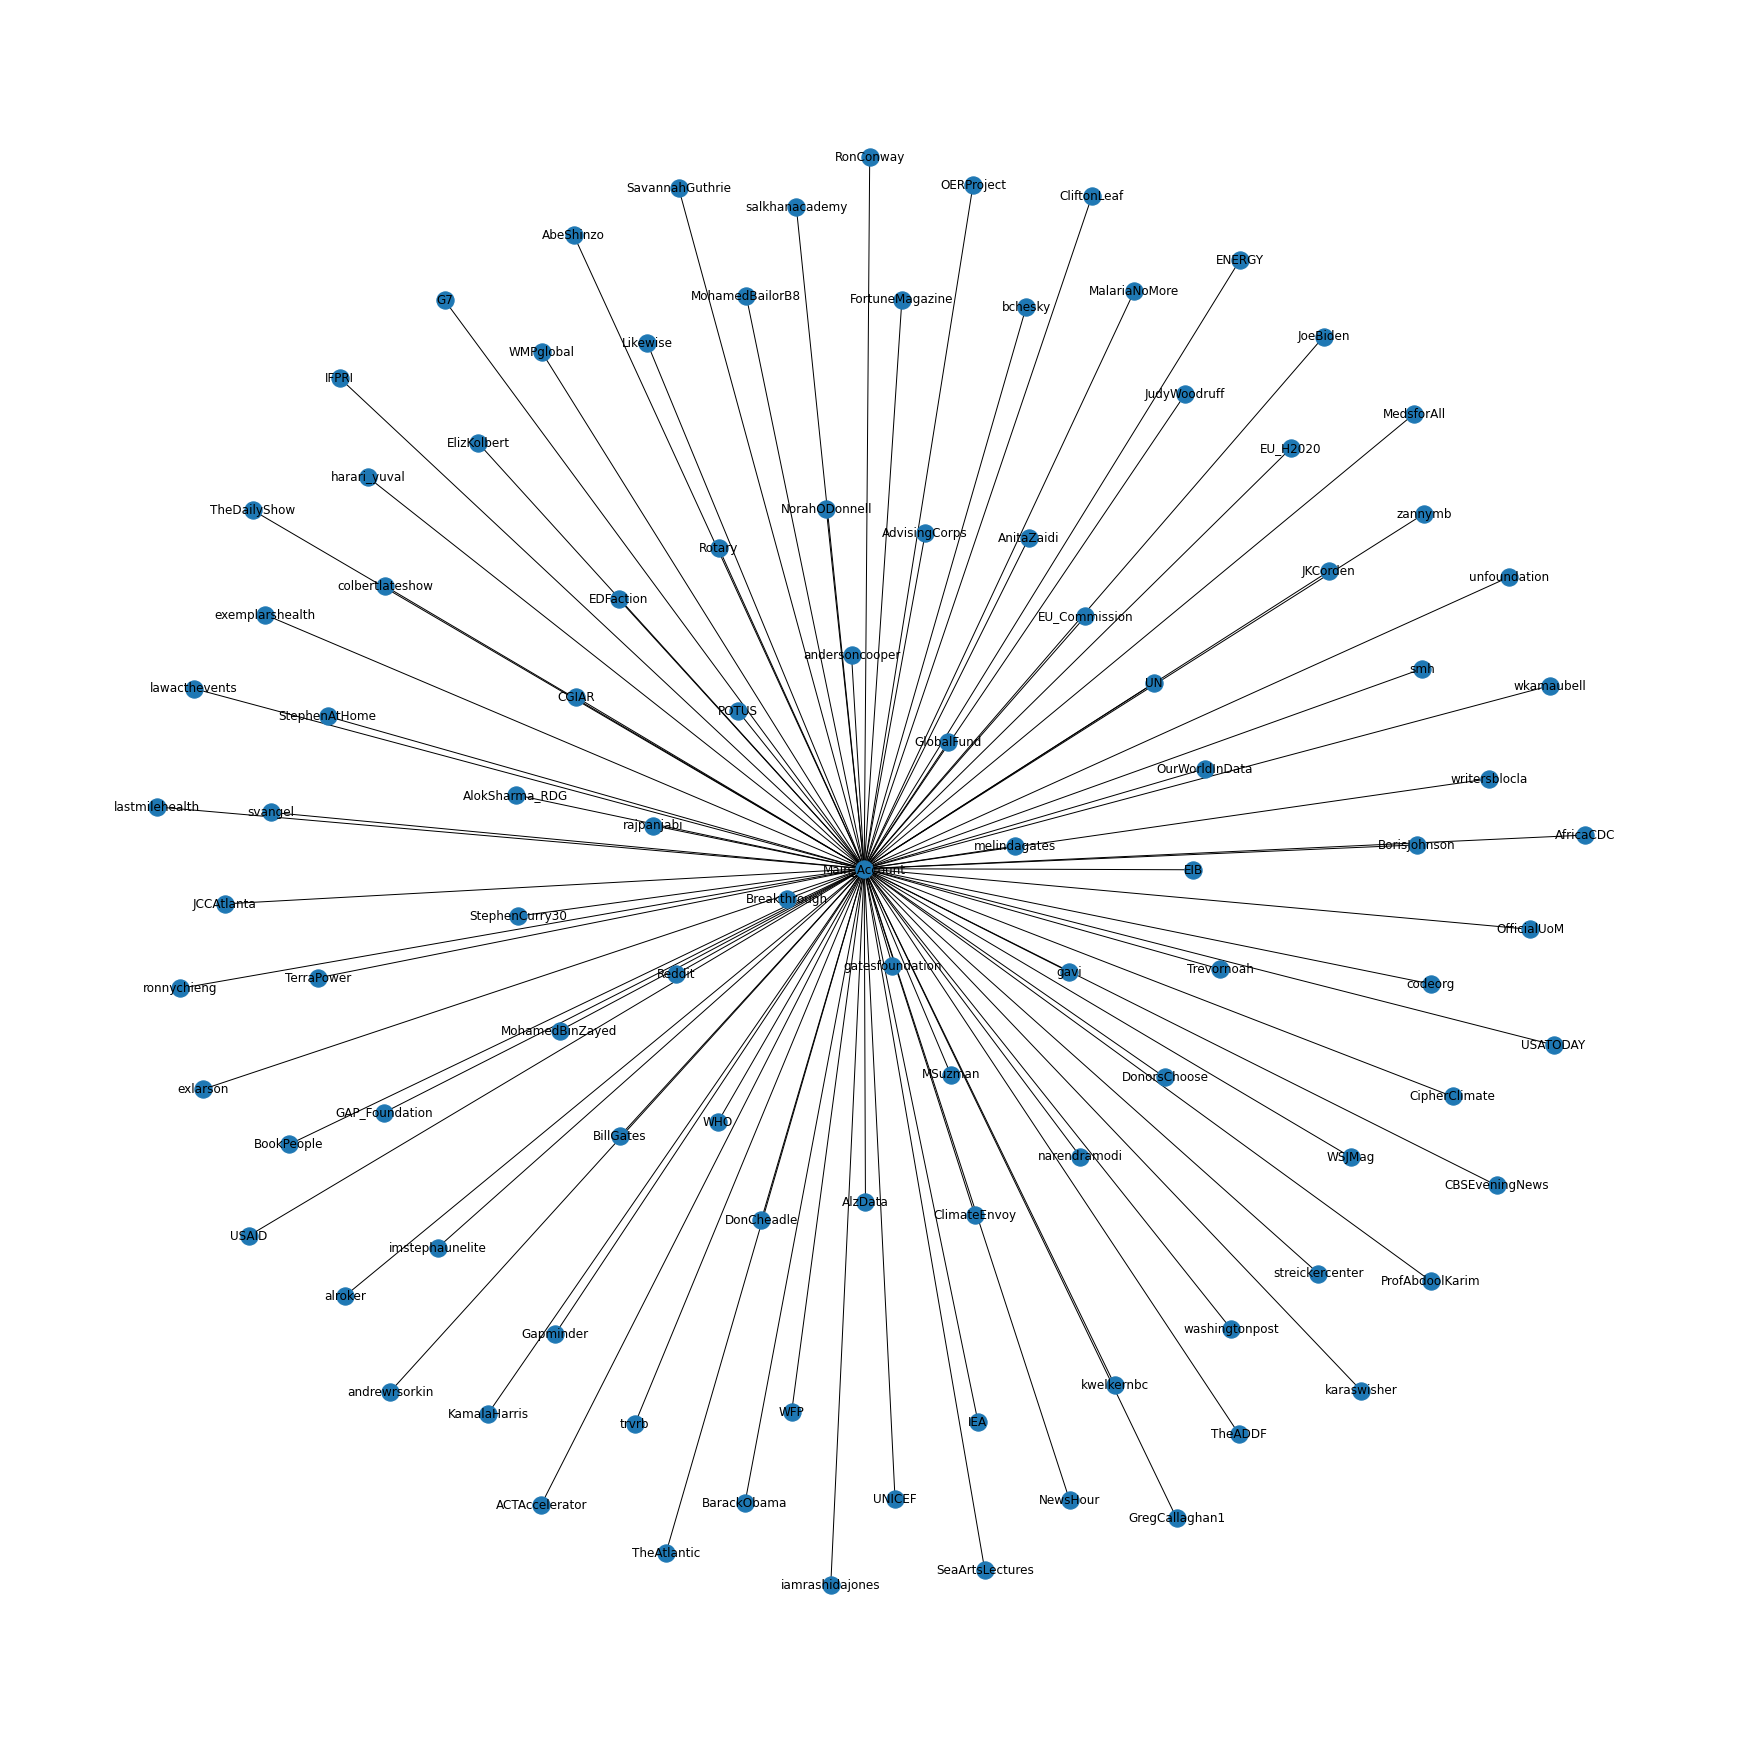

In [17]:
pos = nx.spring_layout(mentionsGraph)
#nx.draw(mentionsGraph,pos=pos,node_size=30)
#labels = nx.get_edge_attributes(mentionsGraph,'weight')
#nx.draw_networkx_edge_labels(mentionsGraph,pos,edge_labels=labels)
plt.figure(3,figsize=(24,24)) 
nx.draw(mentionsGraph,pos,with_labels=True)
plt.show()